# Variability Statistics for raw Forced Photometry lightcurves  in  g00_21.csv 

A  notebook to plot the results of full analysis on single patch-file g00_21.csv , in an effort to clean-up S13Agg_first_look, and facilitate easier reproducibility 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## varMetricsFull : stats on full unbinned LC , 1000 bootstraps

In [2]:

Dir =  '/astro/store/scratch/tmp/suberlak/s13_stripe82/forced_phot_lt_23/NCSA/Var/'
File = 'Varg00_21_1000_bootstraps.csv'
varMetricsFull = pd.read_csv(Dir+File)

varMetricsFull.columns

Index([u'objectId', u'N', u'avgMJD', u'chi2DOF', u'chi2R', u'flagLtTenPts',
       u'muFull', u'psfFluxMean', u'psfFluxMeanErr', u'psfFluxMedian',
       u'psfFluxMedianErr', u'psfFluxSigG', u'psfFluxSkew', u'psfFluxStDev',
       u'rangeMJD', u'sigmaFull', u'psfMean', u'psfMedian', u'psfMeanErr',
       u'psfMedianErr'],
      dtype='object')

In [3]:
np.sum(varMetricsFull['N'].values < 55 )

1030

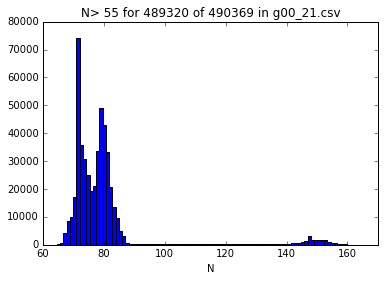

In [4]:
%matplotlib inline
xMin = 55
m = varMetricsFull['N'] > xMin
plt.hist(varMetricsFull['N'][m], bins=100)
plt.title('N> %d for %d of %d in g00_21.csv'%(xMin, np.sum(m),len(m) ))
plt.xlim(60,170)
plt.xlabel('N')
#plt.savefig('Varg00_21_1000_bootstraps_hist_N.png')

In [5]:
hist, bin_edges = np.histogram(varMetricsFull['N'][varMetricsFull['N'].values> 55].values, bins=np.arange(56,163), density=False)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2



In [6]:
len(varMetricsFull['N'][varMetricsFull['N'].values> 55].values)

489320

In [8]:
# time_hist is in miliseconds 
N = [72,144]
time = [9.02, 15.9]  
p = np.polyfit(N,time,deg=1)
time_hist = p[0] + p[1] * bin_cen
ttl_time = np.sum(hist*time_hist) / (1000 * 60 * 60 )
print('For 1000 bootstraps it took %.2f hours' % ttl_time)
# thus I get that it roughly took  22.85 hours with  N = 1000 bootstraps.... 

N = [72,144]
time = [62.2, 122]
p = np.polyfit(N,time,deg=1)
time_hist = p[0] + p[1] * bin_cen
ttl_time = np.sum(hist*time_hist) / (1000 * 60 * 60 )
print('For 10000 bootstraps it took %.2f hours' % ttl_time)

For 1000 bootstraps it took 23.33 hours
For 10000 bootstraps it took 26.26 hours


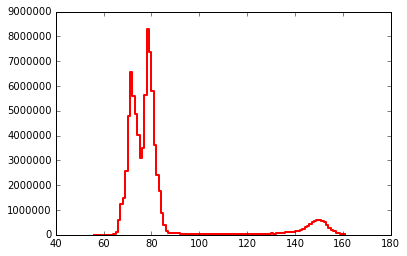

In [9]:
# N pts per lightcurve and time of calculation for N=1000 bootstraps
N = [72,144]
time = [9.02, 15.9]
p = np.polyfit(N,time,deg=1)
time_hist = p[0] + p[1] * bin_cen
fig,ax = plt.subplots()
#ax.plot(bin_cen, time_hist, color = 'blue', ls='steps', lw=2)
ax.plot(bin_cen, hist*time_hist, color='red', ls='steps', lw=2)

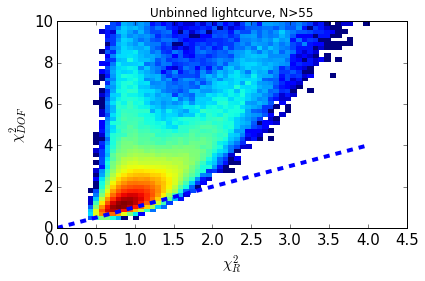

In [10]:
%matplotlib inline
# Plot some results : full LC : 
fig, ax = plt.subplots()
xMin = 55
m4 = varMetricsFull['N'].values  > xMin
lim = 10
m1=varMetricsFull[m4]['chi2R'].values<lim
m2=varMetricsFull[m4]['chi2DOF'].values<lim
m= m1*m2  # logical and 

H, xedges, yedges = np.histogram2d(varMetricsFull[m4]['chi2R'].values[m],varMetricsFull[m4]['chi2DOF'].values[m], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax.plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax.set_xlabel(r'$\chi^{2}_{R}$', fontsize=15)
ax.set_ylabel(r'$\chi^{2}_{DOF}$', fontsize=15)
ax.set_title('Unbinned lightcurve, N>%d'%xMin)
#ax.set_xlim(0,lim)
#ax.set_ylim(0,lim)
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.savefig('Varg00_21_1000_bootstraps_Chi2R_vs_Chi2DOF_yMax_10.png')

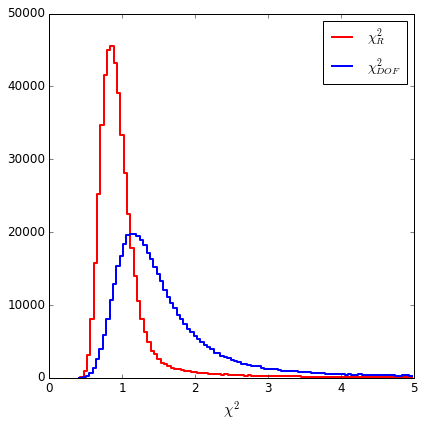

In [11]:
%matplotlib inline 

fig,ax = plt.subplots(1,1 , figsize=(6,6))

nbins=100

nMin = 55
m4 = varMetricsFull['N'].values  > nMin

chi2Rlim = 5
m=varMetricsFull[m4]['chi2R'].values< chi2Rlim
hist, bin_edges = np.histogram(varMetricsFull[m4]['chi2R'].values[m], bins=nbins, density=False)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax.plot(bin_cen, hist, color = 'red', ls='steps', lw=2, label=r'$\chi^{2}_{R}$')
#ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)


chi2DOFlim = 5
m=varMetricsFull[m4]['chi2DOF'].values<chi2DOFlim
hist, bin_edges = np.histogram(varMetricsFull[m4]['chi2DOF'].values[m], bins=nbins, density=False)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax.plot(bin_cen, hist, color = 'blue', ls='steps', lw=2, label=r'$\chi^{2}_{DOF}$')
ax.legend(fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(r'$\chi^{2}$', fontsize=15)
plt.tight_layout()
#fig.subplots_adjust(wspace=0.36, hspace=0.26, left=0.12, right=0.94, bottom=0.10, top=0.95)
plt.savefig('Varg00_21_1000_bootstraps_Chi2R_vs_Chi2DOF_hist.png')

In [13]:
nMin = 55
m4 = varMetricsFull['N'].values  > nMin
np.sum(varMetricsFull['sigmaFull'][m4] > 100)
print('N> %d for %d of %d in g00_21.csv'%(nMin, np.sum(m4),len(m4) ))

N> 55 for 489320 of 490369 in g00_21.csv


In [12]:
nMin = 55
m4 = varMetricsFull['N'].values  > nMin

sigMax = 1

ma = 0<varMetricsFull[m4]['sigmaFull']
mb = varMetricsFull[m4]['sigmaFull']<sigMax
m1 = ma*mb
varMetricsSig  = varMetricsFull[m4][m1]
print(' 0 < sigmaFull < %d for %d of %d in N>55 objects in g00_21.csv'%(sigMax, np.sum(m1),len(m1) ))

/astro/apps6/anaconda2.0/lib/python2.7/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


 0 < sigmaFull < 1 for 210376 of 489320 in N>55 objects in g00_21.csv


In [14]:
np.sum(varMetricsFull[m4]['sigmaFull']==0 )

278305

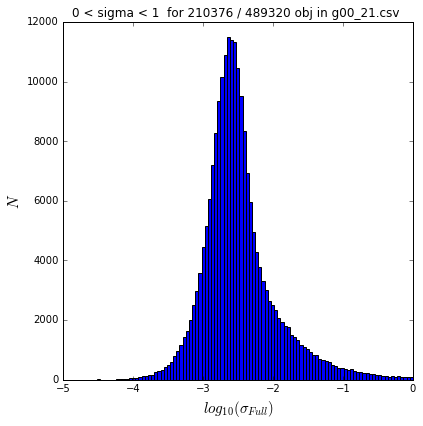

In [15]:
%matplotlib inline 
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.hist(np.log10(varMetricsSig['sigmaFull']), bins=100)
ax.set_ylabel(r'$N$',fontsize=15)
ax.set_xlabel(r'$log_{10}(\sigma_{Full})$', fontsize=15)
ax.set_title(r'0 < sigma < %d  for %d / %d obj in g00_21.csv ' %(sigMax, np.sum(m1),len(m1)), fontsize=12)
plt.tight_layout()

plt.savefig('Varg00_21_1000_bootstraps_sigma.png')

In [16]:
len(varMetricsSig['muFull'])

210376

In [17]:
max(varMetricsSig['sigmaFull'])

0.99840272222499993

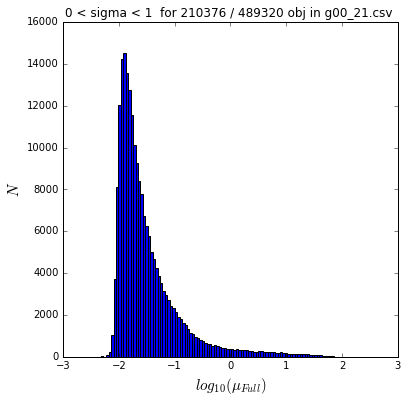

In [18]:
%matplotlib inline 
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.hist(np.log10(np.array(varMetricsSig['muFull'].values).astype(float)), bins=100)
ax.set_title(r'0 < sigma < %d  for %d / %d obj in g00_21.csv ' %(sigMax, np.sum(m1),len(m1)), fontsize=12)
ax.set_ylabel(r'$N$',fontsize=15)
ax.set_xlabel(r'$log_{10}(\mu_{Full})$', fontsize=15)
plt.savefig('Varg00_21_1000_bootstraps_mu.png')

In [19]:
# Select variable candidates  

m1 = (varMetricsFull['sigmaFull'] > 0).values  # 234883
m2 =  (varMetricsFull['chi2DOF'] > 1).values   # 346886
m3 = (varMetricsFull['chi2R'] > 1).values      # 172602
m= np.ma.mask_or(m3, np.ma.mask_or(m1,m2))
print('Out of %d objects,:\n'%len(m)) 
print('%d fulfill  sigma>0 OR chi2R>1 OR chi2DOF>1' % ( np.sum(m)))

# The  '3 sigma' definition (more strict) ...
N = varMetricsFull['N'] #  number of pts per lightcurve 
m4 = varMetricsFull['chi2DOF'] > (1 + 3.0 * np.sqrt(2 / N )) ##  170517
m5 = varMetricsFull['chi2R'] > (1 + 3.0 * np.sqrt(2 / N))   ## 37464
# one or the other   170534
print('Also, %d fulfill chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) ' % (np.sum(m4|m5)))
print('Also, %d fulfill sigma > 0 OR  chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) ' % (np.sum(m1|m4|m5)))
 # 265981   sigma OR  chi2R  OR chi2DOF 
print('Also, %d fulfill sigma > 0 AND [ chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) ]' % (np.sum(m1*(m4|m5))))
#

m = m1*(m4|m5)
# Grab only those rows that correspond to variable objects...

varMetricsVarOnly = varMetricsFull[m]

Out of 490369 objects,:

428295 fulfill  sigma>0 OR chi2R>1 OR chi2DOF>1
Also, 235462 fulfill chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) 
Also, 296312 fulfill sigma > 0 OR  chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) 
Also, 151035 fulfill sigma > 0 AND [ chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) ]


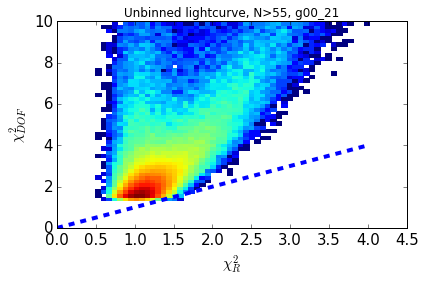

In [20]:
%matplotlib inline
# Plot some results : full LC : 
fig, ax = plt.subplots()
xMin = 55
m4 = varMetricsVarOnly['N'].values  > xMin
lim = 10
m1=varMetricsVarOnly[m4]['chi2R'].values<lim
m2=varMetricsVarOnly[m4]['chi2DOF'].values<lim
m= m1*m2  # logical and 

H, xedges, yedges = np.histogram2d(varMetricsVarOnly[m4]['chi2R'].values[m],varMetricsVarOnly[m4]['chi2DOF'].values[m], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax.plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax.set_xlabel(r'$\chi^{2}_{R}$', fontsize=15)
ax.set_ylabel(r'$\chi^{2}_{DOF}$', fontsize=15)
ax.set_title('Unbinned lightcurve, N>%d, g00_21'%xMin)
#ax.set_xlim(0,lim)
#ax.set_ylim(0,lim)
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.savefig('Varg00_21_10000_bootstraps_Chi2R_vs_Chi2DOF_yMax_10_VarOnly.png')

In [21]:
# Compare sigma with 10000 bootstraps compared to 1000 bootstraps  
DirIn  = '/astro/store/scratch/tmp/suberlak/s13_stripe82/forced_phot_lt_23/NCSA/Var/'
name ='Varg00_21_10000_bootstraps.csv'
varMetrics1e4 = pd.read_csv(DirIn+name)
name ='Varg00_21_1000_bootstraps.csv'
varMetrics1e3 = pd.read_csv(DirIn+name)



In [22]:
varMetricsJoin =  pd.merge(varMetrics1e3, varMetrics1e4, how='left', on='objectId',left_index=False, right_index=False, sort=True,
      suffixes=('_x', '_y'), copy=True)


In [23]:
varMetricsJoin[['sigmaFull_x','sigmaFull_y' ]].head()

,sigmaFull_x,sigmaFull_y
0,0.003416,0.003590
1,0.003350,0.003318
2,0.000000,0.000000
3,0.003079,0.003449
4,0.004473,0.004695


In [24]:
xMin = 55
m = varMetricsJoin['N_x'].values  > xMin
m1=varMetricsJoin[m]['sigmaFull_x'].values>0
#m2=varMetricsJoin[m]['sigmaFull_y'].values>0
m3=varMetricsJoin[m]['sigmaFull_x'].values<1
#m4=varMetricsJoin[m]['sigmaFull_y'].values<1 
msk =m1*m3


varMetricsPlot = varMetricsJoin[m][msk]

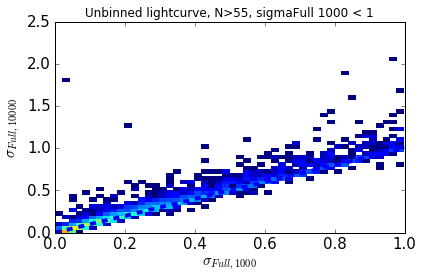

In [25]:
%matplotlib inline
# Plot some results : full LC : 
fig, ax = plt.subplots()

H, xedges, yedges = np.histogram2d(varMetricsPlot['sigmaFull_x'].values,varMetricsPlot['sigmaFull_y'].values, bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax.plot(np.linspace(0,1.5), np.linspace(0,1.5), ls='--', lw=4)
ax.set_xlabel(r'$\sigma_{Full, 1000}$', fontsize=15)
ax.set_ylabel(r'$\sigma_{Full, 10000}$', fontsize=15)
ax.set_title('Unbinned lightcurve, N>%d, sigmaFull 1000 < 1'%xMin)
ax.set_xlim(0,1)
#ax.set_ylim(0,lim)
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.savefig('Varg00_21_bootstraps_compare_sigma.png')

In [26]:
x = np.abs(varMetricsPlot['sigmaFull_x'].values - varMetricsPlot['sigmaFull_y'].values) / varMetricsPlot['sigmaFull_x'].values

(array([  1.22608000e+05,   2.22600000e+04,   1.27300000e+04,
          8.86000000e+03,   6.72800000e+03,   5.19100000e+03,
          4.10300000e+03,   3.22200000e+03,   2.71000000e+03,
          2.28300000e+03,   1.87000000e+03,   1.53600000e+03,
          1.35600000e+03,   1.17200000e+03,   1.03300000e+03,
          9.02000000e+02,   8.34000000e+02,   7.26000000e+02,
          6.49000000e+02,   5.72000000e+02,   5.06000000e+02,
          4.68000000e+02,   4.03000000e+02,   3.86000000e+02,
          3.52000000e+02,   5.05000000e+02,   3.30000000e+02,
          2.94000000e+02,   2.35000000e+02,   2.37000000e+02,
          2.24000000e+02,   2.39000000e+02,   2.08000000e+02,
          2.08000000e+02,   1.56000000e+02,   1.37000000e+02,
          1.53000000e+02,   1.27000000e+02,   1.56000000e+02,
          1.33000000e+02,   1.28000000e+02,   1.12000000e+02,
          1.16000000e+02,   1.17000000e+02,   9.00000000e+01,
          9.00000000e+01,   9.10000000e+01,   7.10000000e+01,
        

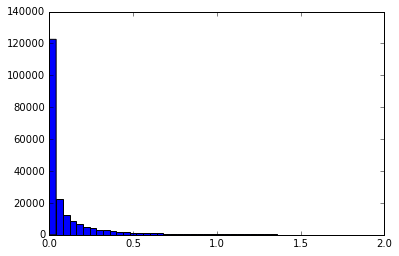

In [29]:
%matplotlib inline 
fig,ax = plt.subplots()
ax.hist(x[x<2], bins=50)

In [30]:
y = np.log10(varMetricsPlot['sigmaFull_x'].values / varMetricsPlot['sigmaFull_y'].values)

## varMetricsSeasonal : metrics for Seasons for full LC on g00_21.csv 

In [31]:
#  only for variable objects 
#     ( here : N=1000 bootstraps,  used strict variability definition 
#     m1*(m4 | m5), where  m1 = (varMetricsFull['sigmaFull'] > 0)
#      m4 = varMetricsFull['chi2DOF'] > (1 + 3.0 * np.sqrt(2 / N )) ##  170517
# m5 = varMetricsFull['chi2R'] > (1 + 3.0 * np.sqrt(2 / N))   )

In [32]:
DirIn  = '/astro/store/scratch/tmp/suberlak/s13_stripe82/forced_phot_lt_23/NCSA/Var/'
name = 'SeasVarg00_21_1000_bootstraps.csv'
varMetricsSeasonal= pd.read_csv(DirIn+name)

In [33]:
varMetricsSeasonal.head()

,objectId,season,N,avgMJD,chi2DOF,chi2R,flagLtTenPts,muFull,psfFluxMean,psfFluxMeanErr,psfFluxMedian,psfFluxMedianErr,psfFluxSigG,psfFluxSkew,psfFluxStDev,rangeMJD,sigmaFull
0,216172782516437336,0.0,13.0,52767.700160,2.201456,1.888938,NaN,0.015001399093876018,1.430169e-29,1.013931e-30,1.481434e-29,1.270774e-30,7.801653e-30,0.0,5.168289e-30,1532.757866,0.003422
1,216172782516437336,1.0,21.0,53667.596293,1.657391,0.974494,NaN,0.01577785650303653,1.567939e-29,1.231513e-30,1.687467e-29,1.543473e-30,8.669612e-30,0.0,5.946312e-30,82.891143,0.001552
2,216172782516437336,2.0,23.0,54028.141095,2.629647,1.276034,NaN,0.015562815870718573,1.528438e-29,1.115401e-30,1.884968e-29,1.397948e-30,9.055049e-30,0.0,5.610564e-30,92.921374,0.002257
3,216172782516437336,3.0,15.0,54395.611967,2.414379,1.270620,NaN,0.014557636730170884,1.349460e-29,1.214454e-30,1.704120e-29,1.522092e-30,6.241453e-30,0.0,6.736747e-30,64.959241,0.004777
4,216172782516437339,0.0,14.0,52777.885227,1.263577,0.836415,NaN,0.044455034371950274,4.434739e-29,1.070287e-30,4.384218e-29,1.341406e-30,3.851477e-30,0.0,4.493279e-30,1532.757866,0.001935


In [34]:
m = varMetricsSeasonal['chi2DOF'] < 10


(array([  7.22600000e+03,   1.69038000e+05,   2.40199000e+05,
          8.65880000e+04,   2.55660000e+04,   9.75600000e+03,
          3.68500000e+03,   1.15200000e+03,   2.14000000e+02,
          2.20000000e+01]),
 array([ 0.01523308,  0.48526884,  0.9553046 ,  1.42534036,  1.89537612,
         2.36541188,  2.83544764,  3.3054834 ,  3.77551916,  4.24555493,
         4.71559069]),
 <a list of 10 Patch objects>)

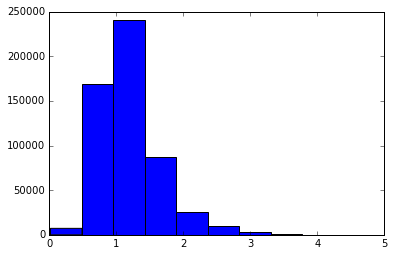

In [35]:
plt.hist(varMetricsSeasonal[m]['chi2R'].values)

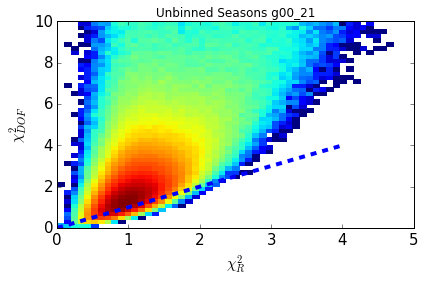

In [36]:
%matplotlib inline
# Plot some results : full LC : 
fig, ax = plt.subplots()

lim = 10
m1=varMetricsSeasonal['chi2R'].values<lim
m2=varMetricsSeasonal['chi2DOF'].values<lim
m= m1*m2  # logical and 

H, xedges, yedges = np.histogram2d(varMetricsSeasonal['chi2R'].values[m],varMetricsSeasonal['chi2DOF'].values[m], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax.plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax.set_xlabel(r'$\chi^{2}_{R}$', fontsize=15)
ax.set_ylabel(r'$\chi^{2}_{DOF}$', fontsize=15)
ax.set_title('Unbinned Seasons g00_21')
#ax.set_xlim(0,lim)
#ax.set_ylim(0,lim)
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.savefig('SeasVarg00_21_1000_bootstraps_Chi2R_vs_Chi2DOF_yMax_10_VarOnly.png')

## varMetricsFullSeasonal : metrics for seasonally binned lightcurves 

In [37]:
DirIn  = '/astro/store/scratch/tmp/suberlak/s13_stripe82/forced_phot_lt_23/NCSA/Var/'
name = 'FullSeasVarg00_21_1000_bootstraps.csv'
varMetricsFullSeasonal= pd.read_csv(DirIn+name)

In [38]:
varMetricsFullSeasonal.head()

,objectId,Nseasons,chi2DOFmean,chi2DOFmedian,chi2Rmean,chi2Rmedian,muFull,psfFluxMeanErrMean,psfFluxMeanMean,sigmaFull
0,216172782516437336,4.0,0.681644,1.548436,0.845969,0.623895,0.014666,1.143825e-30,1.469002e-29,0.000000
1,216172782516437339,4.0,1.031613,0.230616,0.784815,0.324736,0.043201,1.213863e-30,4.300576e-29,0.000000
2,216172782516437346,4.0,0.874691,2.897802,0.627589,1.867501,0.011479,1.110731e-30,1.160085e-29,0.000000
3,216172782516437358,4.0,3.360890,5.273573,1.328345,1.499660,0.014187,1.121437e-30,1.432032e-29,0.001347
4,216172782516437360,4.0,1.442797,4.016759,1.010807,1.686722,0.009765,1.108440e-30,9.915796e-30,0.000303


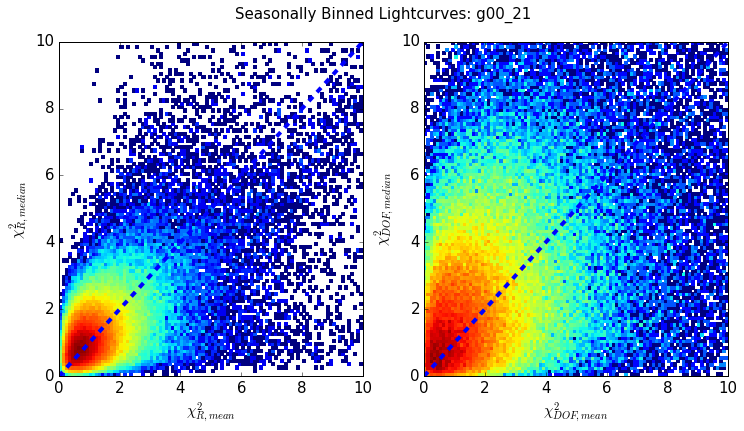

In [39]:
%matplotlib inline 

df = varMetricsFullSeasonal

from astroML.plotting import scatter_contour
#astroML.plotting.scatter_contour(x, y, levels=10, threshold=100, log_counts=False, histogram2d_args={}, plot_args={}, contour_args={}, ax=None)
fig, ax = plt.subplots(1,2,figsize=(12,6))
lim = 10

m1=df['chi2Rmean'].values<lim
m2=df['chi2Rmedian'].values<lim
m=m1*m2
#scatter_contour(seasonAvgChi2['chi2'].values[m], seasonAvgChi2['chi2R'].values[m] , threshold=200, 
#                log_counts=False, ax=ax)
#maskCol = (ri < xlim[1])&(ri>xlim[0])&(gr<ylim[1])&(gr>ylim[0])
nbins=100
H, xedges, yedges = np.histogram2d(df['chi2Rmean'].values[m],df['chi2Rmedian'].values[m],bins=nbins)
#H, xedges, yedges = np.histogram2d(grri_dropna[1],grri_dropna[0],bins=nbins)
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax[0].pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax[0].plot(np.linspace(0,lim), np.linspace(0,lim), ls='--', lw=4)
ax[0].set_xlabel(r'$\chi^{2}_{R,mean}$', fontsize=15)
ax[0].set_ylabel(r'$\chi^{2}_{R, median}$', fontsize=15)
ax[0].set_xlim(0,lim)
ax[0].set_ylim(0,lim)
ax[0].tick_params(axis='both', which='major', labelsize=15)  

lim = 10
m1=df['chi2DOFmean'].values<lim
m2=df['chi2DOFmedian'].values<lim
m=m1*m2
#scatter_contour(seasonAvgChi2['chi2'].values[m], seasonAvgChi2['chi2R'].values[m] , threshold=200, 
#                log_counts=False, ax=ax)
#maskCol = (ri < xlim[1])&(ri>xlim[0])&(gr<ylim[1])&(gr>ylim[0])
nbins=100
H, xedges, yedges = np.histogram2d(df['chi2DOFmean'].values[m],df['chi2DOFmedian'].values[m],bins=nbins)
#H, xedges, yedges = np.histogram2d(grri_dropna[1],grri_dropna[0],bins=nbins)
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax[1].pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax[1].plot(np.linspace(0,lim), np.linspace(0,lim), ls='--', lw=4)
ax[1].set_xlabel(r'$\chi^{2}_{DOF,mean}$', fontsize=15)
ax[1].set_ylabel(r'$\chi^{2}_{DOF, median}$', fontsize=15)
ax[1].set_xlim(0,lim)
ax[1].set_ylim(0,lim)
ax[1].tick_params(axis='both', which='major', labelsize=15) 
fig.subplots_adjust( top=0.90)
fig.suptitle('Seasonally Binned Lightcurves: g00_21', fontsize=15)

#plt.tight_layout()
plt.savefig('FullSeasVarg00_21_1000_bootstraps_Chi2R_vs_Chi2DOF.png')

In [43]:
np.shape(H)

(100, 100)

In [44]:
np.shape(xedges)

(101,)